__<font size="5">Marketing Analytics: Customer Segmentation </font>__

***Customer Segmentation with  K-means***

**Author:** *Alidu Okpanachi*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

__<font size="6">Table of Contents</font>__


* [Introduction](#Introduction)
* [Data Description](#Description)
* [Data Preparation](#Preparation)
    * [Duplicates](#Duplicates)
    * [Missing Values](#Missing)
    * [Outliers](#Outliers)    
    * [Outliers Removal](#outliers-removal)
    * [Data Transformation](#Transformation)
    
* [Correlation Matrix](#Correlation-Matrix)
    * [Groupping Features Analysis](#GFA)
* [Customer Segmentation](#Customer-Segmentation)
* [K-Means Result](#K-Means-Result)
* [Modelling](#Modelling)
* [Segment Visualization](#Segment-Visualization)
* [Summary](#Summay)
* [Conclusion](#Conclusion)
* [Recommendation](#Recommendation)

# Introduction <a class="anchor" id="Introduction"></a>
The aim of this data analytics project is to perform customer segmentation analysis for an e-
commerce company. By analyzing customer behavior and purchase patterns, the goal is to
group customers into distinct segments. This segmentation can inform targeted marketing
strategies, improve customer satisfaction, and enhance overall business strategies.

## Data Description <a class="anchor" id="Description"></a>
The goal of this project is to analyze customer behavior and group them into distinct segments. These insights can be leveraged for targeted marketing strategies, improving customer satisfaction, and enhancing overall business performance.

## Data Preparation <a class="anchor" id="Preparation"></a>

In [2]:
#load dataset to the environment
food_data = pd.read_csv("ifood_df.csv")

In [3]:
#view the first five rows of the dataset
food_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
#view the last five rows of the dataset
food_data.tail()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0
2204,52869.0,1,1,40,84,3,61,2,1,21,...,0,0,0,0,0,0,1,151,130,0


In [5]:
food_data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [6]:
#show descriptive statistics of the dataset
food_data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [7]:
#checking the data type
food_data.dtypes

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

In [8]:
#checking the data info
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

### Duplicates <a class="anchor" id="Duplicates"></a>

In [9]:
#checking for duplicates
food_data.duplicated().sum()

184

In [10]:
# Drop the duplicates
food_df = food_data.drop_duplicates()

In [11]:
# checking for duplicates
food_df.duplicated().sum()

0

I checked for duplicate i discover 184 duplicated rows and i drop it

### Missing Values <a class="anchor" id="Missing"></a>

In [12]:
#checking for missing value
print(food_df.isnull().sum())


Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

I checked for missing values and there is no missing values in the dataset

### Outliers <a class="anchor" id="Outliers"></a>

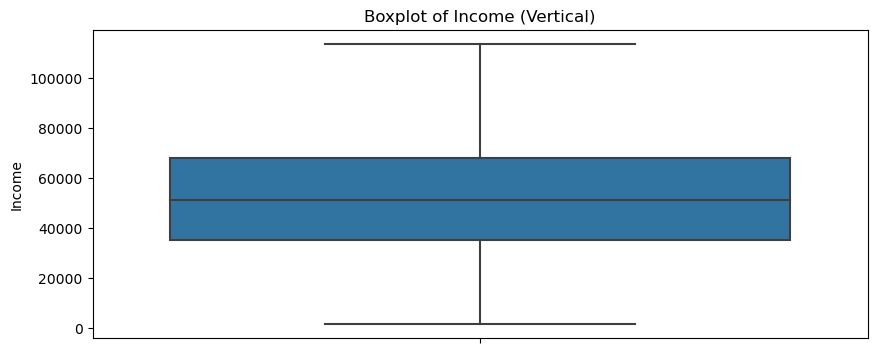

In [13]:
# Checking for outliers using a vertical boxplot
plt.figure(figsize=(10, 4)) # Taller figure for better vertical display
sns.boxplot(y=food_df['Income'])
plt.title("Boxplot of Income (Vertical)")
plt.ylabel("Income")
plt.show()





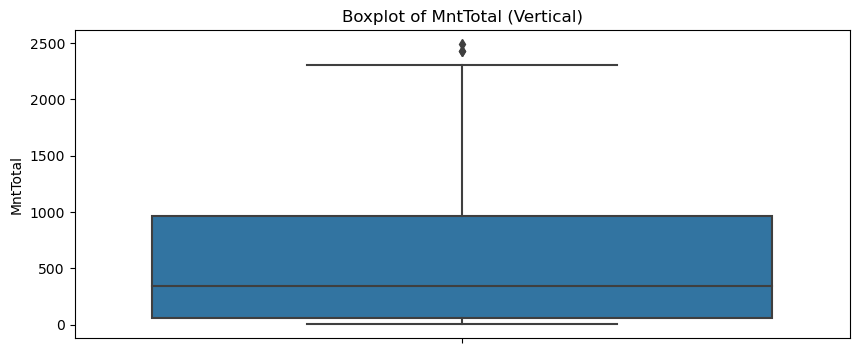

In [14]:
# Checking for outliers using a vertical boxplot
plt.figure(figsize=(10, 4)) # Taller figure for better vertical display
sns.boxplot(y=food_df['MntTotal'])
plt.title("Boxplot of MntTotal (Vertical)")
plt.ylabel("MntTotal")
plt.show()





### Outlier Removal <a class="anchor" id="Outliers-Removal"></a>

In [15]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = food_df['MntTotal'].quantile(0.25)
Q3 = food_df['MntTotal'].quantile(0.75)

# IQR is the range between Q3 and Q1
IQR = Q3 - Q1

# Define the lower and upper bounds for acceptable data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [16]:
# Keep only rows where MntTotal is within the IQR bounds
food_df_cleaned = food_df[
    (food_df['MntTotal'] >= lower_bound) & 
    (food_df['MntTotal'] <= upper_bound)
]

In [17]:
print(f"Rows before cleaning: {len(food_df)}")
print(f"Rows after removing outliers: {len(food_df_cleaned)}")

Rows before cleaning: 2021
Rows after removing outliers: 2018


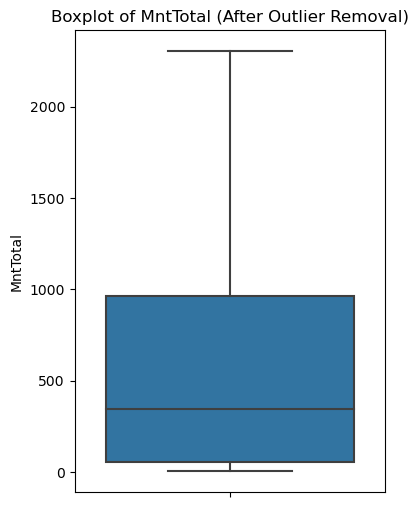

In [18]:
# Vertical boxplot to show clean MntTotal values
plt.figure(figsize=(4, 6))
sns.boxplot(y=food_df_cleaned['MntTotal'])
plt.title("Boxplot of MntTotal (After Outlier Removal)")
plt.ylabel("MntTotal")
plt.show()

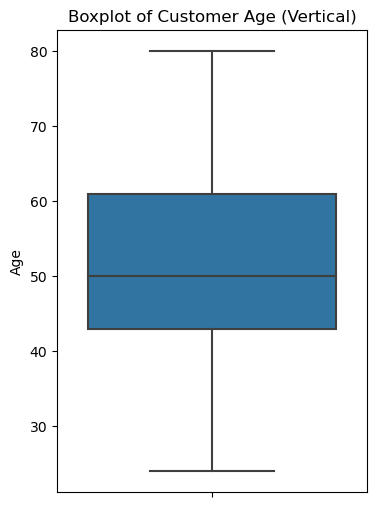

In [19]:
# Create a vertical boxplot to show Age distribution and outliers
plt.figure(figsize=(4, 6))  # Make it tall for vertical orientation
sns.boxplot(y=food_df['Age'])  # Use y-axis to rotate the boxplot
plt.title("Boxplot of Customer Age (Vertical)")
plt.ylabel("Age")
plt.show()

### Data Transformation <a class="anchor" id="Transformation"></a>

In [20]:
# Creating a copy
food_EDA = food_df.copy()

In [21]:
# View the copy
food_EDA

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5,1,6,3,4,3,...,0,0,0,0,1,0,0,19,16,0
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [22]:
#checking the data info
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [23]:
# Transforming data
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
food_EDA['Marital'] = food_EDA.apply(get_marital_status, axis=1)

In [24]:
food_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2204
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2021 non-null   float64
 1   Kidhome               2021 non-null   int64  
 2   Teenhome              2021 non-null   int64  
 3   Recency               2021 non-null   int64  
 4   MntWines              2021 non-null   int64  
 5   MntFruits             2021 non-null   int64  
 6   MntMeatProducts       2021 non-null   int64  
 7   MntFishProducts       2021 non-null   int64  
 8   MntSweetProducts      2021 non-null   int64  
 9   MntGoldProds          2021 non-null   int64  
 10  NumDealsPurchases     2021 non-null   int64  
 11  NumWebPurchases       2021 non-null   int64  
 12  NumCatalogPurchases   2021 non-null   int64  
 13  NumStorePurchases     2021 non-null   int64  
 14  NumWebVisitsMonth     2021 non-null   int64  
 15  AcceptedCmp3         

In [25]:
# Conversion of Age from numeric data type to categorical using age range
food_EDA['Age Range']=pd.cut(x=food_EDA.Age,bins=[17, 37, 52, 116],labels=['18-37 years', '38-52 years', '>52 years'])

In [26]:
food_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2204
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Income                2021 non-null   float64 
 1   Kidhome               2021 non-null   int64   
 2   Teenhome              2021 non-null   int64   
 3   Recency               2021 non-null   int64   
 4   MntWines              2021 non-null   int64   
 5   MntFruits             2021 non-null   int64   
 6   MntMeatProducts       2021 non-null   int64   
 7   MntFishProducts       2021 non-null   int64   
 8   MntSweetProducts      2021 non-null   int64   
 9   MntGoldProds          2021 non-null   int64   
 10  NumDealsPurchases     2021 non-null   int64   
 11  NumWebPurchases       2021 non-null   int64   
 12  NumCatalogPurchases   2021 non-null   int64   
 13  NumStorePurchases     2021 non-null   int64   
 14  NumWebVisitsMonth     2021 non-null   int64   
 15  Acce

## Correlation Matrix <a class="anchor" id="Correlation-Matrix"></a>

### Groupping Features Analysis <a class="anchor" id="Groupping Features Analysis"></a>

In [27]:
# Demographic information
cols_demographics = ['Income', 'Age']

# Children in houshold
cols_children = ['Kidhome', 'Teenhome']

# Marrital status (One-hot encoded)
cols_marital = [
    'marital_Divorced',
    'marital_Married',
    'marital_Single',
    'marital_Together',
    'marital_Widow'
]

In [28]:

# Spending behavior
cols_mnt = [
    'MntTotal',
    'MntRegularProds',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]

In [29]:

# Communication and engagement
cols_communication = ['Complain', 'Response', 'Customer_Days']

In [30]:
# Marketing campaigns
cols_campaigns = [
    'AcceptedCmpOverall',
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5'
]

In [31]:
# Purchase channels
cols_source_of_purchase = [
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth'
]

In [32]:
# Educational levels (One-hot encoded)
cols_education = [
    'education_2n Cycle',
    'education_Basic',
    'education_Graduation',
    'education_Master',
    'education_PhD'
]

In [33]:
selected_columns = ['MntTotal'] + cols_demographics + cols_children

# Calculate the correlation matrix using only the selected columns
corr_matrix = food_EDA[selected_columns].corr()

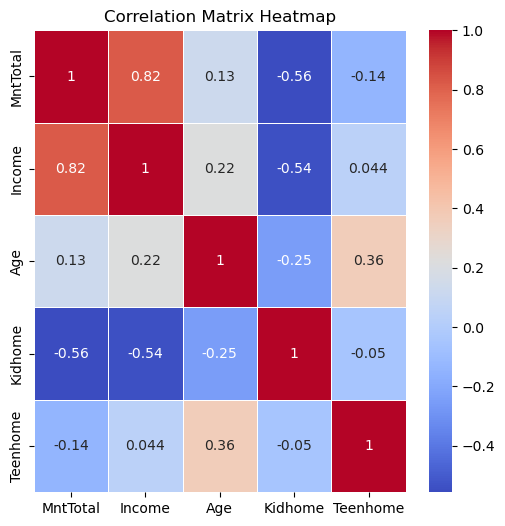

In [34]:
# Set the figure size for better readability
plt.figure(figsize=(6, 6))

# Creat a heatmap of a correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add a title to the plot
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()

In [35]:
# View the statistics descriptive
food_EDA.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,...,0.251856,0.034636,0.090549,0.024245,0.502227,0.165760,0.217219,563.789213,519.867392,0.302326
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,...,0.434186,0.182902,0.287038,0.153848,0.500119,0.371957,0.412455,576.775749,554.797857,0.680812
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.000000
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000


In [36]:
# Example Total Amount Spent
food_EDA["TotalSpend"] = food_EDA[["MntRegularProds", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis=1)

In [37]:
food_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2204
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Income                2021 non-null   float64 
 1   Kidhome               2021 non-null   int64   
 2   Teenhome              2021 non-null   int64   
 3   Recency               2021 non-null   int64   
 4   MntWines              2021 non-null   int64   
 5   MntFruits             2021 non-null   int64   
 6   MntMeatProducts       2021 non-null   int64   
 7   MntFishProducts       2021 non-null   int64   
 8   MntSweetProducts      2021 non-null   int64   
 9   MntGoldProds          2021 non-null   int64   
 10  NumDealsPurchases     2021 non-null   int64   
 11  NumWebPurchases       2021 non-null   int64   
 12  NumCatalogPurchases   2021 non-null   int64   
 13  NumStorePurchases     2021 non-null   int64   
 14  NumWebVisitsMonth     2021 non-null   int64   
 15  Acce

## Customer Segmentation <a class="anchor" id="Customer Segmentation"></a>

In [38]:
# Select features relevant for clustering
features = food_EDA[["Income", "Recency", "TotalSpend", "NumWebPurchases", "NumStorePurchases"]]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

 ## K-Means Result <a class="anchor" id="K-Means Result"></a>

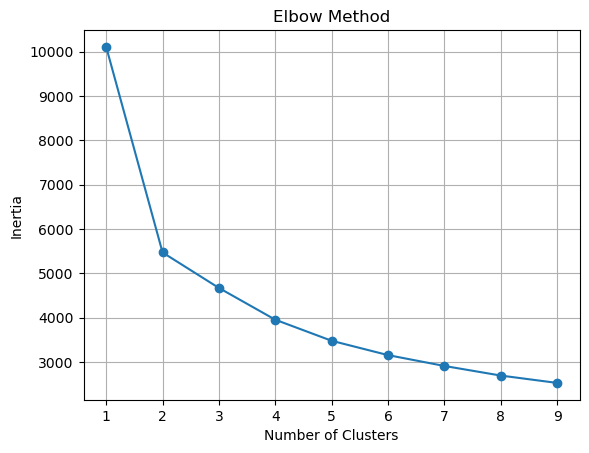

In [39]:
# I try using different numbers of clusters to find the optimal one
inertia = []    # This list will store the "intertia" (a measure of cluster tightness) for each value of k

# Loop through cluster counts from i to 9
for k in range(1, 10):
    
    # Create a KMeans model with k cluster
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model on the scaled features
    kmeans.fit(scaled_features)
    
    # Stor the inertia value (sum of squared distances to the nearest cluster center)
    inertia.append(kmeans.inertia_)
    
# Now i will plot the results to use the elbow method
plt.plot(range(1, 10), inertia, marker='o')     # Plot inertia for each value of k
plt.xlabel("Number of Clusters")                 # Label the x-axis
plt.ylabel("Inertia")                              # Label the y-axix
plt.title("Elbow Method")                           # Add a title to the plot
plt.grid(True)                                        # Add gridlines for better readability
plt.show()                                              # Display the plot
                

## Modelling <a class="anchor" id="Modelling"></a>

In [40]:
# Create a KMeans clustering model with 4 clusters and a fixed random state for reproducibility
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the scaled features and assign each data point to one of the clusters
# Then, store the cluster labels in a new column called "Segment" in the DataFrame
food_EDA["Segment"] = kmeans.fit_predict(scaled_features)

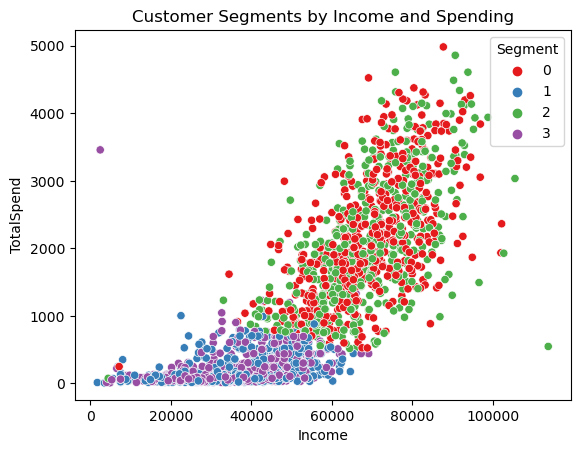

In [41]:
# Create a scatter plot to visualize how customer segments are distributed based on income and total spending
sns.scatterplot(
    x="Income",              # Set the x-axis to represent customer income
    y="TotalSpend",          # Set the y-axis to represent total spending
    hue="Segment",           # Color the points based on their assigned customer segment
    data=food_EDA,                 # Use the data from the DataFrame 'df'
    palette="Set1"           # Use a predefined color palette for better visual distinction between segments
)

# Add a title to the plot
plt.title("Customer Segments by Income and Spending")

# Display the plot
plt.show()

In [42]:
# Calculate the average values of key metrics for each customer segment
segment_summary = food_EDA.groupby("Segment")[[
    "Income",              # Average income
    "TotalSpend",          # Average total spending
    "Recency",             # Average number of days since last purchase
    "NumWebPurchases",     # Average number of online purchases
    "NumStorePurchases"    # Average number of in-store purchases
]].mean()

In [43]:
# Print out the summary to see the average statistics for each segment
print(segment_summary)


               Income   TotalSpend    Recency  NumWebPurchases  \
Segment                                                          
0        68747.632094  2111.671233  73.091977         5.731898   
1        36181.928437   221.932203  73.118644         2.446328   
2        68720.223629  2058.679325  22.481013         6.128692   
3        34740.435644   210.122772  23.675248         2.344554   

         NumStorePurchases  
Segment                     
0                 8.201566  
1                 3.474576  
2                 8.481013  
3                 3.328713  


## Segment Visualization <a class="anchor" id="Segment Visualization"></a>

In [44]:
# Create a dictionary containing the customer segment data
# Each key represents a metric, and the values are the corresponding numbers for each segment
data = {
    "Segment": [0, 1, 2, 3],
    "Income": [68747.63, 36181.93, 68720.22, 34740.44],
    "TotalSpend": [2111.67, 221.93, 2058.68, 210.12],
    "Recency": [73.09, 73.12, 22.48, 23.68],
    "NumWebPurchases": [5.73, 2.45, 6.13, 2.34],
    "NumStorePurchases": [8.20, 3.47, 8.48, 3.33]
}

In [45]:
# Convert the dictionary into a DataFrame for easier manipulation and analysis
df = pd.DataFrame(data)

# Set 'Segment' as the index of the DataFrame so each row corresponds to a customer segment
df.set_index("Segment", inplace=True)

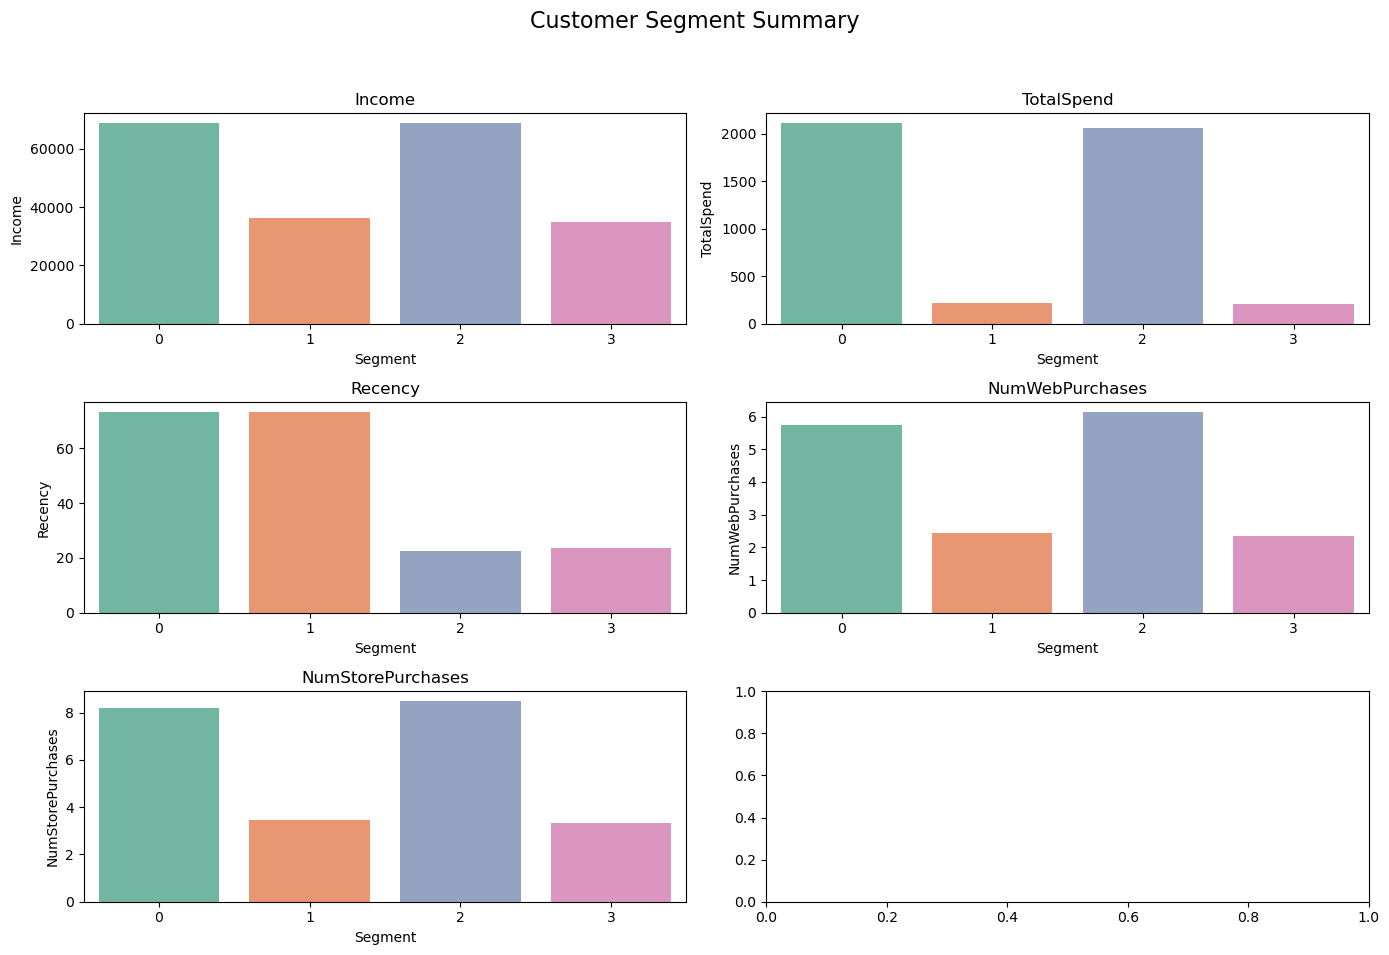

In [46]:
# Create a grid of subplots (3 rows and 2 columns) for visualizing each metric
fig, axs = plt.subplots(3, 2, figsize=(14, 10))  # Adjust size for better readability

# Add a title to the entire figure
fig.suptitle("Customer Segment Summary", fontsize=16)

# Loop through each metric and plot it as a bar chart by segment
metrics = df.columns  # Get the list of metrics (columns)
for ax, metric in zip(axs.flatten(), metrics):
    sns.barplot(x=df.index, y=df[metric], ax=ax, palette="Set2")  # Create a barplot for each metric
    ax.set_title(metric)               # Set the title of the subplot to the metric name
    ax.set_xlabel("Segment")           # Label x-axis as "Segment"
    ax.set_ylabel(metric)              # Label y-axis with the name of the metric

# Adjust layout to prevent overlap and ensure everything fits
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Step 8: Display the full figure with all subplots
plt.show()

## Summary <a class="anchor" id="Summary"></a>

#### The segments with high-spenders?

Segment 2 and Segment 0 have the highest average TotalSpend. These customers are our high-spending VIP customers. They may deserve loyalty programs, premium offers, or exclusive discounts to keep them engaged.



#### The segments that are inactive or low-income?

Segment 1 and Segment 3 have low income and low total spending. Customers in these segments are less engaged and possibly churned. They could benefit from reactivation campaigns, small discounts, or simple loyalty incentives.



#### The target marketing campaigns Schedule to each group?

Segment Type	Targeted Strategy
* High-Spenders	VIP programs, exclusive offers, premium product bundles
* Low-Income / Inactive	Budget-friendly offers, discounts, reminders, loyalty rewards
* Moderate Income, High Web Purchases	Upsell online-only deals, email marketing
* Recent but Low Spend	Encourage bigger baskets with combo deals or free shipping

## Conclusion <a class="anchor" id="conclusion"></a>
Segment 0 and Segment 2 represent high-income, high-spending customers with frequent purchases.

Segment 2 is more recently active (low recency), while Segment 0 hasn't purchased in a while (high recency).

Segment 1 and Segment 3 are low-income, low-spending customers with fewer purchases.

Segment 3 is more recently engaged than Segment 1.



## Recommendations <a class="anchor" id="Recommendation"></a>
Segment 0 – High income, high spend, but inactive
Action: Launch re-engagement campaigns (e.g., loyalty rewards or personalized emails) to bring them back.

Goal: Reignite interest among valuable but inactive customers.

Segment 1 – Low income, low spend, and inactive
Action: Limit marketing spend; focus only on cost-effective strategies like automated emails or passive advertising.

Goal: Maintain minimal engagement at low cost.

Segment 2 – High income, high spend, and active
Action: Prioritize this group for VIP programs, exclusive offers, or upselling.

Goal: Retain and further increase lifetime value.

Segment 3 – Low income, low spend, but active
Action: Offer discounts or budget-friendly bundles to increase purchase volume.

Goal: Nurture loyalty and gradually grow spending habits.